# Literature Generator

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import pandas as pd

## Loading CSV'S

Here we are loading the CSV files generated from the previous web scraping notebook. We will see some cleaning up in the below cells. The generation and exporting of the CSV files from the previous notebook caused some of these additional elements to be injected. Be sure to look at the dataframe first to see if these items have been inserted. The Fastai won't be able to run properly, or at all, if they're in there.

In [ ]:
path = '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/book-files'
# be sure to change this path if you're doing it on your own device. You can do this by importing and running below
# import os
# os.getcwd()


In [42]:
# df = pd.read_csv('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/book-files/dfNarrative.csv')
# # df.pop('Unnamed: 0.1')
# df.pop('Unnamed: 0')
# df.dropna()
# df = df.dropna()
df.to_csv('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/book-files/dfNarrative.csv')

In [ ]:
# df = pd.read_csv('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/book-files/dfDialogue.csv')
# # df.pop('Unnamed: 0.1')
# df.pop('Unnamed: 0')
# df.dropna()
# df = df.dropna()
df.to_csv('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/book-files/dfDialogue.csv')

In [60]:
# df.words.replace(regex=True,inplace=Tre,to_replace=[r'\t', 'â', '\(\)' ],value=r'')
# this element is left over from the previous notebook. After looking at the data, it may need to be run again.

In [126]:
# df = pd.read_csv('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/book-files/dfDialogue.csv', index_col='words')
df.fillna('')
df.tail(40)

""
words
"“My dear Mr Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?”"
"“But it is,” returned she; “for Mrs Long has just been here, and she told me all about it”"
“Do you not want to know who has taken it?” cried his wife impatiently
"“ want to tell me, and I have no objection to hearing it”"
"“Why, my dear, you must know, Mrs Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it, that he agreed with Mr Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week”"
...
"For a long moment no one spoke Then Paulette, with tears of happinessdimming her eyes, turned and gripped Adam's hand in her own ""Mydear,"" she smiled, ""thank you"" As Adam turned to her, he felt Waylandgripping his other hand tightly ""I understand, sir Nothing will besaid"" Adam smiled tenderly at Paulette, then his eyes turned anxiouslyto search those of his crew On every face was a commending grin ofapproval In every pair of eyes was a promise that had been given, andwould be kept With a suspicious huskiness in his voice, Adam drewhimself erect ""Thank you gentlemen,"" he said softly The crew filedout"
"With his arm around Paulette, he drew her gently to the starboard port,and pointed to a dim, fast-receding, silver-green orb ""There it is,darling I don't know whether to curse it or bless it"" He grinned ather quizzically She came close to him, and her arms stole gently abouthim ""I'll bless it as long as I live,"" she breathed"
NaN


As you can see above, the NaN elements are the items that need to be removed by running the above cells.

### Tokenization

Borrowed from the Fastai course, we can take a closer look at what's going on under the hood:

The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation. such as our commas, periods...etc...
- some words are contractions of two different words, like isn't or don't So our 's, 't and 're can be classified as proper conjunctions...etc...
- we may need to clean some parts of our texts, if there's HTML code for instance or other random artifacts

To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [45]:
data = TextClasDataBunch.from_csv(path, 'dfNarrative.csv')
data.show_batch()

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
94847, 40578, 47246, 11450, 67689...
  if getattr(ds, 'warn', False): warn(ds.warn)


text,target
xxbos that was a relief wherever you be let your wind go free who knows if that xxunk i took with my cup of tea after was quite good with the heat i xxunk anything off it i m sure that xxunk man in the xxunk is agreat rogue i hope that lamp is not smoking fill my nose up with xxunk betterthan having him leaving the gas on all,33284
"xxbos 1 . xxmaj it is grossly false that our ministers , as is said in a note , had proposed to surrender our claims to compensation for xxmaj spanish spoliations , or even for xxmaj french . xxmaj their instructions were to make no treaty in which xxmaj spanish spoliations were not provided for ; and although they were permitted to be silent as to xxmaj french spoliations carried",20721
"xxbos xxmaj the indocile liberty of this member is very remarkable , so xxunk unruly in its tumidity and impatience , when we do not require it , and so unseasonably disobedient , when we stand most in need of it : so imperiously contesting in authority with the will , and with so much haughty obstinacy denying all solicitation , both of hand and mind . xxmaj and yet",55374
"xxbos i must now trouble xxmaj congress with a petition on my own behalf . xxmaj when i left my own house in xxmaj october , 1783 , it was to attend xxmaj congress as a member , and in expectation of returning in five or six months . xxmaj in the month of xxmaj may following , however , i was desired to come to xxmaj europe , as",18682
"xxbos xxmaj the mass of human concerns , moral and physical , is so vast , the field of knowledge requisite for man to conduct them to the best advantage is so extensive , that no human being can acquire the whole himself , and much less in that degree necessary for the instruction of others . xxmaj it has of necessity , then , been distributed into different departments",21139


The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols: 
- the "'s" are grouped together in one token
- the contractions are separated like this: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several special tokens (all those that begin by xx), to replace unknown tokens (see below) or to introduce different text fields (here we only have one).

________ ____

### What is TextClasDataBunch?
This class method calls upon a parent class of DataLoader. This is how Fastai will prepare our specific text data for use in recurrent neural networks. DataLoader is the base framework for machine learning preparation. TextClasDataBunch is one of the several methods used to prepare data. Others include classes for vision learning and tabular learning (csv type data).

### What is DataLoader?
Taking a closer look under the hood, we can see that DataLoader is the Pytorch component of Fastai. This is essentially combines our dataset with a sampler. so it will iterate through our data and help arrange it in the fashion best suited for whichever machine learning element we are trying to accomplish. In this case, we're using Natural Language Processing (NLP). 
To put it simply, we are determining what size of chunks we want to split our data into, the randomness of those chunks, how many samples we want and then turning those bits of data into Tensors.

### What is a Tensor?
To put it simply, a tensor is a saved portion of memory that is stored in its linear algebra form. This is the backbone of machine learning. By storing it in this linear form, we are able to take these chunks of data and process them through our graphics cards. This is what makes machine learning more practical. The speed of running our weights and activations via linear algebra processes allows us to process results magnitudes above what the CPU could provide.

### What is DataBunch?
DataBunch is the Fastai method of grouping together our data loaded via DataLoader. It's easier to consider that DataLoader is the 'under the hood' portion of our NLP, and DataBunch is closer to a user level component. 
Here we are essentially taking our data that was provided to DataLoader and splitting it between several groups. More specifically, these groups are going to be training sets, validations sets and test sets. This is where our subsequent Fastai functions will be pulling the information from to conduct the machine learning.
So to put it all together:
- TextDataBunch (or it's other derivatives) calls upon DataLoader to take the provided data and transform it into a usable interface for the linear functions used by the graphics card processor
- DataLoader prepares the provided data in a Tensor form
- DataBunch takes the DataLoader product and places it into validation, train and test folders in order to utilize the further Fastai functions to conduct machine learning.

____________________________________________________________________________________________________________

### Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.

The correspondence from ids to tokens is stored in the `vocab` attribute of our datasets, in a dictionary called `itos` (for int to string).

In [ ]:
data.vocab.itos[:30]

In [39]:
# Here we can lo
# data.train_ds[0][]

In [40]:
# data.train_ds[0][0].data[:10]

### With the data block API

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the various arguments to pass will appear in the step they're relevant, so it'll be more readable.

## Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here. This will break down our data into digestable pieces.

In [8]:
bs=15

The book literature is in a training and test set following an imagenet structure. The only difference is that there is an `unsup` folder on top of `train` and `test` that contains the unlabelled data.

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipedia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word is, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because written English novels aren't the same as the English of wikipedia, we'll need to adjust the parameters of our model by a little bit. Plus there might be some words that would be extremely common in the novels dataset but would be barely present in wikipedia, and therefore might not be part of the vocabulary the model was trained on.

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [46]:
data_lm = (TextList.from_csv(path, 'dfNarrative.csv', cols=1)
           #Inputs: all the text files in path
#             .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% of our book segments for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lmNarrative.pkl')

### TextList:
Let's take a closer look at what's going on above. At first glance, it looks similar to what we did in previous cells when we created our 'data' object. However, in this case we will be utilizing those items created by the function.
This process is setting up our tokenized items and splitting them into their proper training, validation and optionally test sets. We further indicate that these items need to be labeled in preparation for our language model learning.

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere). This will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set). And then it will send batches that read that text in an attempt to aim for targets that are the next word in the sentence.


In [6]:
#The cell above being a bit long, we want to load quickly the final ids by using the following cell.
data_lm = load_data(path, 'data_lmNarrative.pkl', bs=15)

In [48]:
data_lm.show_batch()

idx,text
0,"property of some one or other of their daughters . xxbos xxmaj mr. xxmaj bennet made no answer . xxbos xxmaj this was invitation enough . xxbos xxmaj mr. xxmaj bennet was so odd a mixture of quick parts , sarcastic humour , reserve , and caprice , that the experience of three - and - twenty years had been insufficient to make his wife understand his character . mind"
1,"the general gaze from the foundations of the world — the figure of the sharp female called xxmaj la xxmaj guillotine . xxbos xxmaj it was the popular theme for jests ; it was the best cure for headache , it infallibly prevented the hair from turning grey , it imparted a peculiar delicacy to the complexion , it was the xxmaj national xxmaj razor which shaved close : who"
2,"churchill , was only growing to dislike him more . xxmaj he began to suspect him of some double dealing in his pursuit of xxmaj emma . xxmaj that xxmaj emma was his object appeared indisputable . xxmaj every thing declared it ; his own attentions , his father 's hints , his mother - in - law 's guarded silence ; it was all in unison ; words ,"
3,"average for our xxmaj unit . xxmaj this is a work proper to be committed to mathematicians as well as merchants , and which should be decided on actual and accurate experiment . xxbos xxmaj the quantum of alloy is also to be decided . xxmaj some is necessary , to prevent the coin from wearing too fast ; too much , fills our pockets with copper , instead of"
4,", to the heads of departments the trouble of making up , once a day , a packet of all their communications for the perusal of the xxmaj president ; it commonly also retarded one day their despatches by mail . xxmaj but in pressing cases , this injury was prevented by presenting that case singly for immediate attention ; and it produced us in return the benefit of his"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `the directory pathway` (or elsewhere if you specified different paths in your config file).

In [18]:
data_lm = load_data(path, 'data_lm.pkl', bs=15)

In [19]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

### What is the language_model_learner?
Here we have another class method that is using our data_lm object in addition to two other elements involving a 'language learner.' Let's take a closer look at this methodology.

The learner in this case is 'AWD_LSTM.' This is an acronym for " Average (Stochastic Gradient Descent) Weight Dropped- Long-Short Term Memory Networks." This is understably a mouth full. But it's important to understand the Stochastic Gradient Descent (SGD) is the bedrock of machine learning. Everything we have been previously doing is preparing the data to perform this function. 
The AWD_LSTM is also known as the arch type. In this case, that means it also utilizes the previously mentioned [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset) backbone. As mentioned before, it was trained to predict the next word in a sentence after given a certain arrangement of words (in this case, it was words in wikipedia pages). We will refer back to this in the future, as it involves utilizing the previously taught (learned) weights and allows us to remove the back end to build on top of it.

This is an extensive topic that requires more than a snippet of a Jupyter Notebook markdown, however, you can find detailed understandings via fast.ai's online course. I will do my best to give the general sense of its functionality.
_____

#### Stochastic Gradient Descent (SGD):
This is an iterative optimization algorithm, where in the objective is to find a set of parameters that produces the minimum value in a given set of inputs. In our case for machine learning, we are trying to find the best parameters of an unknown function to produce the minimum amount of incorrect answers produces by our machine learning program. 

There are of course several components involved in SGD. Such as; Momentum, Averaging and Adaptive Movement Estimation along with several others. We will eventually go over these items as we dig into the code.

#### Weight Dropping:

In general the AWD_LSTM will utilize the weight dropout method during the layers of the Recurrent Neural Network (RNN) and it's subsequent final activation layer. Why Randomized dropping of weights? Simply put, it has been empirically proven to work. The function is basically saving a copy of a weight before deleting it, then running through a round of the full RNN. The program can then compare these outcomes to other rounds of iterating through the RNN to find a more optimal solution.

Doing this through several epochs (rounds through all of the layers of the RNN) has proven to provide a much higher accuracy for machine learning predictions. This methodology applies to all aspects of machine learning and not just Natural Language Processing.
__________

Finally, we can see that our last input to the class is 'drop_mult.' This is simply the amount of random weight drops we wish to see within our learner.

- There are other defaults within the source code, however, we won't jump into them now. They're essentially options regarding when and where to apply the weight dropping previously discussed.

In [20]:
learn.load('fit_headDialogue');
#NOTE THIS METHOD IS DEPRICATED FOR VERSIONS PAST v1.0.43. it is simply loading the previously saved items.

In [53]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


### LR Finder:
This is our learning rate finder. What is a learning rate? In generic terms, it's the rate at which we alter our Stochastic Gradient Descent function to find the lowest outcome. Again, I will generally explain what's occurring but I recommend further reading on your part to gain a better understanding.

In the general understanding of the SGD, we assume the parabola to be smooth from top to bottom, to top. However, we empirically know this is not the case. There are local minima and maxima within the parabola. So, instead of smooth it is generally more mountainous. This leads to a few negative outcomes.

- Example of 'Ideal' SDG:
<img src="https://miro.medium.com/max/1005/1*_6TVU8yGpXNYDkkpOfnJ6Q.png" alt="Stochastic vs Batch Gradient Descent - Divakar Kapil - Medium" style="width: 450px; height: 279.403px; margin: 0px;"/>
(Source from medium.com)


- Reality of SDG:
<img src="https://imgs.developpaper.com/imgs/bprop.png" alt="Summary of Varieties of Gradient Decline Method | Develop Paper" style="width: 400px; height: 300px; margin: 0px;"/>


One common problem, we could have a learning rate that is too small. This could cause our alogorithm to become stuck in a local minima that is actually not the optimal solution. However, the machine doesn't know that because we forced it to give us a failed solution through our methodology.

Another common problem is having our learing rate set too high. This could unintentionally cause us to jump too far ahead of the optimal solution and essentially ping pong back and forth accomplishing nothing. Fortunately, the smart folks' at fastai have several tested solutions for this issue. We will get into these specifics in a few cells. For now, Let's take a look at the 'lr_find' function.


### lr_find:

This class method actually calls upon another class referred to as LRFinder. In this case, it causes a mock learning session that pulls 100 test learning rates between the range of 1e-07 and 10. Why do this? It's so we can avoid some of the pitfalls mentioned above. We don't want to start training too high and we also don't want to start too low. This gives us a tried and practiced method of finding a good learning rate starter point for future functions.

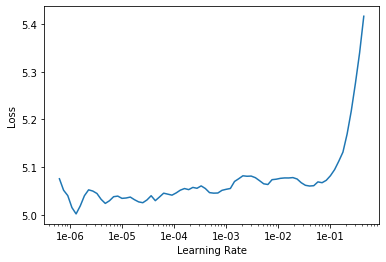

In [54]:
learn.recorder.plot(skip_end=15) #we are simply taking a plot of the loss calculated using our 100 plotting points
# we generated in the cell above.

In [55]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.685467,4.485846,0.248819,11:19


### fit_one_cycle:
Here we have our first look at actually machine learning in action, with the fit_one_cycle function. There's a lot to unpack here. Let's get a glimpse of the code within the function;

- fit_one_cycle(learn:Learner, cyc_len:int, max_lr:Union[float, Collection[float], slice]=slice(None, 0.003, None), moms:Point=(0.95, 0.85), div_factor:float=25.0, pct_start:float=0.3, final_div:float=None, wd:float=None, callbacks:Optional[Collection[Callback]]=None, tot_epochs:int=None, start_epoch:int=None)

Here we can see where our first two elements of '1' and '1e-2' come into play in the previous cell. Which corresponds to a cycle length (cyc_len) of 1 and a maximum learning rate (max_lr) of 1e-2. 

The first portion is fairly sensible, but what about the learning rate? In this case, we are actually determining how high we will allow the learning rate to go. Remember from the previous description of lr_find? We actually found our learning rate in the graph above. We took one order of magnitude prior to the learing rate going exponentially out of control. 

Let's take a look at the third element in the function, 'moms.' I highlighted previously that our learning rate determines how easily we can use our SGD algorithm to find our most optimal answer (the lowest amount of loss). However, having one static number is not the current methodology. Through practical testing, it shows that using momentum in the computations provides a faster time to optimization. How? It calculates a weight to add towards the forward computations. This puts more emphasis on weights that are higher (and more likely to correspond to the lower loss outcome) and puts minimal change on small weights that have a minimal impact on results of the answers produce by the machine learning function.

As you can see from the above fit_one_cycle function, there are several more default elements within. Here's a quick glimpse of the first few:

- div_factor:
Here we use a determined dividing factor to calculate how much we need to increase/decrease our learning rate by, and then how much we decrease and increase the momentum by. To clarify, we have two different components happening simultaneously. 
First, we are taking our lr_max (which was 1e-2 in this case) and dividing that by our div_factor (25 in this case). Taking this computation, we are starting from a starting learning rate (0.003 as indicated by our max_lr:Union) and adding our result to it. We will then add this amount on each iteration until the maximum learning rate is hit (which is 0.02 as we indicated in the above cell). At the same time, we are decreasing our momentum from our maximum momentum rate(0.8) to our lowest momentum rate (0.7) by scaled steps based on the previous calculation from the div_factor.

Second, once we hit the maximum learning rate, and subsequent minimum momentum, we will reverse course and now subtract the calculated div_factor and add back on our momentum. This will be done until we hit our respective minimum learning rate and maximum momentum rate. Then there's one more step.

Lastly, we will take the max_lr/div_factor and multiply it by 100. This will further decrease our learning rate while keeping our maximum momentum the same.

Here is a visual example:

<img src="https://docs.fast.ai/imgs/onecycle_params.png" alt="1cycle parameteres" style="width: 1000px; height: 279.403px; margin: 0px;"/>
(Sourced from fast.ai)


Why do this? Again, it has been empirically tested. This process was modeled after a technique referred to as 'annealing.' Where in the physical sense, it is used to polarize physical objects by heating them up, and cooling them down over periods of time. In the sense of machine learning, this heating, cooling and amount of pressure over time will more effectively navigate around the previously mentioned pitfalls of the SDG (such as too low learning rates, too high, getting stuck in local minimas and then adding too much momentum to explode out of the SDG).

- Example of learning rates:
<img src="https://cdn-images-1.medium.com/max/1000/1*7nmYLhx4cZ_gLPXiyiy6vQ.png" alt="FAST AI JOURNEY: PART 1. LESSON 3. THEORY REVIEW. LEARNING RATES ..." style="width: 800px; height: 300px; margin: 10.8px 0px;"/>
(Sourced from medium.com)

- pct_start:
This one is referring to the amount of iterations we actually want the learning rate to change for. Instead of going up one step per iteration, we will randomly select a percentage that will add towards (or subtract from) the learning rates.

- There are other elements within the function, however, we won't go into details. They are optional items that will be used later on, such as weight decay, callbacks and start_epoch.

In [56]:
learn.save('fit_headNarrative')

In [8]:
learn.load('fit_headNarrative');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [58]:
learn.unfreeze()

### unfreeze:
This function is worth noting in order to further explain the use of architecture backbones (AWD-LSTM in this case) is applied. When we first developed the 'learn' object we identified the backbone AWD-LSTM as our previously trained model. Then we utilized 'fit_one_cycle.' When we did this, all but the last of the layers in the previous model (the wikitext-103 layers within AWD-LSTM) were utlized from the previous training. The final activation layer was replaced with another round of training based upon our data. And then our own final activation layer was inserted after that.

Now when we utilize the unfreeze function, we are allowing all of the other layers within the wikitext-103 to modify their weights along with the portion we added towards the end. This bedrock of machine learning is referred to as transfer learning.

### Transfer Learning:
This is such an important concept towards machine learning, that it's worth mentioning twice. 
Here is one definition;

- Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. For example, knowledge gained while learning to recognize cars could apply when trying to recognize trucks.

The above explanation of unfreeze also provides a explanation of how transfer learning can be used in practice. In that particular case, we used the previously learned knowledge of wikitext-103 and applied it to our book literature data. In other words, someone else took the time to teach a model how to predict the next word in a wikipedia page. We took all of those efforts and then applied them to learn how to predict the next word in our literature data. And there we have it, transfer machine learning in practice.

In [59]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.277780,4.221658,0.269095,11:29
1,4.279351,4.215765,0.275184,11:30
2,4.246326,4.199677,0.279409,11:33
3,4.198082,4.169220,0.283250,11:29
4,4.101477,4.137623,0.287488,11:30
5,4.007540,4.116825,0.290456,11:29
6,3.955282,4.106951,0.292166,11:28
7,3.789952,4.106759,0.293250,11:29


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Above is the same process we used in our previous fit_one_cycle function. The difference here is that we requested 10 epochs to be performed. We can now also delve into what our numbers are that have generated for each epoch:

#### train_loss / valid_loss:
This is simply the loss function calculation performed after the last activation function in our recurrent neural network. One is for our training set (the 90% portion of the data we set apart) and our validation set (the other 10% of our data).
There are actually a variety of ways this loss function can be calculated, we won't go into those minute details here, but know that a basic default used in fast.ai is the cross-entropy loss function. Again, it is a tried and true method to help us minimize the loss function and increase our accuracy.

#### Accuracy:
This is essentially a generic calculation from our loss functions that tells us how accurate our model is at predicting the next word in our literature examples. Our highest is about 29.3%. It may sound low, but let's think about it. Out of all of the words available in our literature AND wikipedia examples, our model can accurately predict the next word almost 1/3 of the time. That may be on par with most humans. In the future, we can try to see where our accuracy is failing at. However, it's a good guess that the complexity of written narration (involving several forms of vernacular across several time periods) is causing learning troubles.

#### Time:
This is simply the amount of time it takes to run through 1 epoch of the training model.

### Note:
You may see the above error message if you let your computer go into sleep mode. I had personally been running my data processing on google cloud platform (please see the [fast.ai](https://course.fast.ai/start_gcp.html) page to learn how to set one up yourself). It's highly recommended considering they give a very generous credit towards computation time. 

In [60]:
learn.save('fine_tunedNarrative')

How good is our model? Well let's try to see what it predicts after a few given words.

In [30]:
learn.load('fine_tunedDialogue');

In [31]:
TEXT = '"Is it the Coronavirus? I asked."'
N_WORDS = 150
N_SENTENCES = 1

In [32]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.7) for _ in range(N_SENTENCES)))

"Is it the Coronavirus? I asked." xxbos “ Well : you must not be angry : i have not had enough of your company to say so But it is no time for me to go into the drawing - room , and i have not a moment to talk of it ” xxbos “ i have no idea , ” replied Monte Cristo ; “ but , unfortunately , you have made me a present of five thousand ” xxbos “ That is true , ” answered Sancho , “ but i will go to my own house , for i have a firm heart , and i am willing to take my oath ” xxbos “ What ! ” he cried , “ do you think that this Frenchman has a right to make a ball ? ” xxbos “ Then i will tell you


### learn.predict:
Above is a nice built in function that allows us to use our taught model to predict words based off of our inputs. In this case I used the object containing the phrase "Is it the Coronavirus? I asked." This then prompted our model to predict a certain amount of words and sentences we determined. In this case, I had it predict 150 words in the form of 1 sentence, which is a bit silly but it gives us some interesting combinations.

Each time the function is ran, it will generate different words. Feel free to play around with it.

I would also like to note that this is just one aspect we can perform with our model. We can also train our model to predict sentiment of the writing and classify it into groups that we have determined. There is even other architecture backbones to utilize for this purpose. If you are interested in performing these i recommend checking out the [fast.ai github page](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson3-imdb.ipynb) notebook that shows this.

We have to save not only the model, but also its encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [12]:
learn.save_encoder('fine_tuned_encDialogue')